In [292]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from pathlib import Path

In [293]:
# Create a path variable to find and clean the data
combined_wacrime = Path('crime-data/combined_wacrime.csv')
combined_wacrime_df = pd.read_csv(combined_wacrime)

# Rename Month and year column to Date
combined_wacrime_df['Date'] = pd.to_datetime(combined_wacrime_df['Month and Year'], format='%b-%y')

# Create new columns for Month and Year
combined_wacrime_df['Month'] = combined_wacrime_df['Date'].dt.month
combined_wacrime_df['Year'] = combined_wacrime_df['Date'].dt.year

# Drop all Nan Rows
combined_wacrime_df = combined_wacrime_df.dropna(how='any', axis=0)

combined_wacrime_df.head()


,Region,Month and Year,Homicide Total,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Recent Sexual Offence Total,Sexual Assault,Non-Assaultive Sexual Offences,...,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Violence Restraint Order Total,Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order,Total Selected Miscellaneous Offences,Date,Month,Year
1,Armadale,Feb-07,0.0,0.0,0.0,0.0,0.0,16.0,10.0,6.0,...,0.0,27.0,45.0,27.0,15.0,3.0,349.0,2007-02-01,2.0,2007.0
2,Armadale,Mar-07,1.0,1.0,0.0,0.0,0.0,8.0,6.0,2.0,...,0.0,41.0,142.0,102.0,36.0,4.0,417.0,2007-03-01,3.0,2007.0
3,Armadale,Apr-07,0.0,0.0,0.0,0.0,0.0,29.0,26.0,3.0,...,0.0,7.0,50.0,37.0,10.0,3.0,153.0,2007-04-01,4.0,2007.0
4,Armadale,May-07,0.0,0.0,0.0,0.0,0.0,22.0,14.0,8.0,...,0.0,20.0,111.0,64.0,44.0,3.0,263.0,2007-05-01,5.0,2007.0
5,Armadale,Jun-07,2.0,0.0,0.0,0.0,2.0,12.0,8.0,4.0,...,0.0,51.0,58.0,45.0,6.0,7.0,286.0,2007-06-01,6.0,2007.0


In [294]:
# Reduce columns (take out all total columns)
combined_wacrime_df = combined_wacrime_df[['Month', 'Year','Murder','Attempted / Conspiracy to Murder','Manslaughter',
                                            'Driving Causing Death','Sexual Assault','Non-Assaultive Sexual Offences',
                                            'Serious Assault (Family)','Common Assault (Family)','Serious Assault (Non-Family)',
                                            'Common Assault (Non-Family)','Assault Police Officer','Threatening Behaviour (Family)',
                                            'Possess Weapon to Cause Fear (Family)','Threatening Behaviour (Non-Family)',
                                            'Possess Weapon to Cause Fear (Non-Family)','Kidnapping / Child Stealing',
                                            'Deprivation of Liberty','Robbery (Business)','Robbery (Non-Business)',
                                            'Burglary (Dwelling)','Burglary (Non-Dwelling)','Stealing of Motor Vehicle',
                                            'Stealing From Motor Vehicle (Contents or Parts)',
                                            'Stealing From Retail Premises (Shoplift)','Stealing From Dwelling',
                                            'Stealing From Other Premises or Place','Stealing as a Servant',
                                            'Stealing (Not Elsewhere Classified)','Criminal Damage','Damage','Cause Bushfire',
                                            'Cause Damage by Fire','Other Fire Related Offences','Drug Dealing','Drug Possession',
                                            'Possession of Drug Paraphernalia','Cultivate or Manufacture Drugs','Other Drug Offences',
                                            'Possess Stolen Property','Receiving Stolen Property','Regulated Weapons Offences',
                                            'Graffiti','Forgery','Fraud (Credit Card)','Fraud (Not Elsewhere Classified)',
                                            'Breach of Family Violence Restraint Order','Breach of Violence Restraint Order',
                                            'Breach of Police Order']]
combined_wacrime_df

,Month,Year,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Sexual Assault,Non-Assaultive Sexual Offences,Serious Assault (Family),Common Assault (Family),...,Possess Stolen Property,Receiving Stolen Property,Regulated Weapons Offences,Graffiti,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order
1,2.0,2007.0,0.0,0.0,0.0,0.0,10.0,6.0,15.0,40.0,...,13.0,3.0,14.0,276.0,1.0,0.0,27.0,27.0,15.0,3.0
2,3.0,2007.0,1.0,0.0,0.0,0.0,6.0,2.0,22.0,40.0,...,6.0,1.0,13.0,232.0,2.0,0.0,41.0,102.0,36.0,4.0
3,4.0,2007.0,0.0,0.0,0.0,0.0,26.0,3.0,19.0,23.0,...,33.0,3.0,5.0,96.0,0.0,0.0,7.0,37.0,10.0,3.0
4,5.0,2007.0,0.0,0.0,0.0,0.0,14.0,8.0,18.0,22.0,...,5.0,5.0,22.0,132.0,0.0,0.0,20.0,64.0,44.0,3.0
5,6.0,2007.0,0.0,0.0,0.0,2.0,8.0,4.0,14.0,28.0,...,8.0,2.0,19.0,177.0,0.0,0.0,51.0,45.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,8.0,2018.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,26.0,...,2.0,1.0,10.0,1.0,0.0,11.0,2.0,9.0,5.0,4.0
3356,9.0,2018.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,25.0,...,6.0,0.0,15.0,2.0,0.0,4.0,0.0,6.0,2.0,5.0
3357,10.0,2018.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,32.0,...,10.0,3.0,29.0,1.0,0.0,11.0,0.0,12.0,4.0,5.0
3358,11.0,2018.0,0.0,0.0,0.0,0.0,6.0,0.0,3.0,26.0,...,3.0,0.0,58.0,1.0,1.0,16.0,4.0,6.0,2.0,3.0


In [295]:
# Replace all Nan values with '0'
combined_wacrime_df = combined_wacrime_df.replace(np.nan, 0)

# Convert all values to integers
combined_wacrime_df = combined_wacrime_df.astype(int)

# Convert Month to month name
combined_wacrime_df['Month'] = pd.to_datetime(combined_wacrime_df['Month'], format='%m').dt.month_name().str.slice(stop=3)                                         
                           
# Group the years
year_wacrime_df = combined_wacrime_df.groupby(["Year"])
print(year_wacrime_df)

# Grouped year_wacrime_df
year_wacrime_df.sum().head(17)

,Month,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Sexual Assault,Non-Assaultive Sexual Offences,Serious Assault (Family),Common Assault (Family),Serious Assault (Non-Family),...,Possess Stolen Property,Receiving Stolen Property,Regulated Weapons Offences,Graffiti,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order
Year,,,,,,,,,,,,,,,,,,,,,
2007,FebMarAprMayJunJulAugSepOctNovDecFebMarAprMayJ...,50,16,14,102,2988,1123,4307,10466,8087,...,2399,1174,4161,29689,354,0,12497,7536,2245,1206
2008,JanFebMarAprMayJunJulAugSepOctNovDecJanFebMarA...,64,14,12,108,3354,1276,5126,10702,9422,...,3396,1694,5054,30228,410,0,14980,8192,2678,1446
2009,JanFebMarAprMayJunJulAugSepOctNovDecJanFebMarA...,46,10,6,132,3072,1516,5466,11278,10168,...,3508,1568,4376,24392,496,0,17222,8092,2736,1532
2010,JanFebMarAprMayJunJulAugSepOctNovDecJanFebMarA...,64,36,12,100,2926,2466,4844,12268,8564,...,2838,1250,3912,19700,444,0,12586,8210,3116,1842
2011,JanFebMarAprMayJunJulAugSepOctNovDecJanFebMarA...,42,28,14,98,2840,1242,4800,14856,8222,...,3088,1194,4338,11022,742,0,13682,10576,2586,2114
2012,JanFebMarAprMayJunJulAugSepOctNovDecJanFebMarA...,70,24,20,126,3090,1226,5250,18638,7556,...,3930,1306,5404,7298,458,0,49018,10594,2248,2846
2013,JanFebMarAprMayJunJulAugSepOctNovDecJanFebMarA...,70,20,6,92,3194,1524,5514,23500,7674,...,4186,1278,5980,7040,454,0,52552,10474,2274,3414
2014,JanFebMarAprMayJunJulAugSepOctNovDecJanFebMarA...,56,12,10,100,4032,2034,5348,24234,7508,...,5674,1466,7648,4552,314,0,43750,9788,2538,3498
2015,JanFebMarAprMayJunJulAugSepOctNovDecJanFebMarA...,56,30,16,106,4188,2522,6652,30434,7800,...,7332,1130,8678,4254,398,0,44032,12470,2332,4512


In [296]:
# Total the number of crimes for each year
total_crimes_df = combined_wacrime_df.groupby('Year').sum(numeric_only=True, min_count=0)

# Print totals
total_crimes_df.sum(axis=1)

# Create a Total Crime column
total_crimes_df['Total Crimes'] = total_crimes_df.sum(axis=1)

# Format Column and print results                 
years_df = total_crimes_df.loc[:,['Total Crimes']].head(17).style.format("{:,.0f}")
years_df

,Total Crimes
Year,
2007,"453,226"
2008,"506,204"
2009,"466,760"
2010,"422,736"
2011,"449,408"
2012,"497,612"
2013,"502,244"
2014,"510,598"
2015,"577,996"


<function matplotlib.pyplot.show(close=None, block=None)>

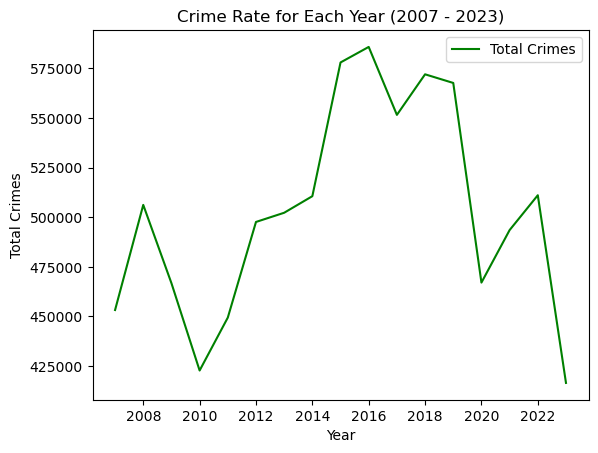

In [297]:
year_line = total_crimes_df.plot(kind='line', color='green', y='Total Crimes', title=("Crime Rate for Each Year (2007 - 2023)"))
year_line.set_ylabel('Total Crimes')
year_line.set_xlabel('Year')
plt.show

In [300]:
# Drop year column
combined_wacrime_df = combined_wacrime_df.drop(columns=['Year'])

# Group the Months
months_wacrime_df = combined_wacrime_df.groupby(["Month"])
print(months_wacrime_df)

months_wacrime_df.sum().head(12)


,Murder,Attempted / Conspiracy to Murder,Manslaughter,Driving Causing Death,Sexual Assault,Non-Assaultive Sexual Offences,Serious Assault (Family),Common Assault (Family),Serious Assault (Non-Family),Common Assault (Non-Family),...,Possess Stolen Property,Receiving Stolen Property,Regulated Weapons Offences,Graffiti,Forgery,Fraud (Credit Card),Fraud (Not Elsewhere Classified),Breach of Family Violence Restraint Order,Breach of Violence Restraint Order,Breach of Police Order
Month,,,,,,,,,,,,,,,,,,,,,
Apr,88,32,34,102,6364,2950,9778,34030,11517,18843,...,7979,1434,8938,12989,1184,23652,28817,17218,3452,5059
Aug,80,40,20,154,6691,3194,9830,35270,12105,21296,...,8197,1487,10288,14950,888,28447,24715,17461,3378,5395
Dec,98,62,34,167,5774,2036,11626,40346,12939,20633,...,6930,1266,8378,12935,440,28876,26787,18203,3015,5910
Feb,82,32,18,115,7082,3028,10213,35702,12640,21658,...,7853,1428,8925,13636,542,27903,25306,18273,4001,5187
Jan,82,26,32,108,6241,3327,11134,39110,13540,19814,...,8241,1618,8743,13158,516,29380,28838,18507,3238,5883
Jul,78,32,14,128,6351,2622,9329,33604,10786,18071,...,8167,1154,8982,15087,613,25706,25737,16635,3166,5365
Jun,55,37,14,131,6088,3928,8992,32863,11008,19220,...,8437,1465,9527,13352,591,26783,35034,17665,3101,4758
Mar,76,32,20,140,7409,3135,11056,37573,13294,23350,...,8626,1696,10083,14385,808,28144,30476,19993,3669,5516
May,98,46,20,132,6584,2951,9565,33584,11470,20120,...,8351,1664,9597,14547,716,26086,38552,19404,3758,4986


In [301]:
# Total the number of crimes for each Month over the 17 year period
total_crimes_months_df = combined_wacrime_df.groupby('Month').sum(numeric_only=True, min_count=0)

# Print totals
total_crimes_months_df.sum(axis=1)

# Create a Total Crime column
total_crimes_months_df['Total Crimes'] = total_crimes_months_df.sum(axis=1)

# Format Column and print results                 
months_df = total_crimes_months_df.loc[:,['Total Crimes']].head(17).style.format("{:,.0f}")
months_df

,Total Crimes
Month,
Apr,"695,186"
Aug,"702,668"
Dec,"703,091"
Feb,"714,761"
Jan,"742,017"
Jul,"680,268"
Jun,"705,931"
Mar,"764,990"
May,"737,388"


<function matplotlib.pyplot.show(close=None, block=None)>

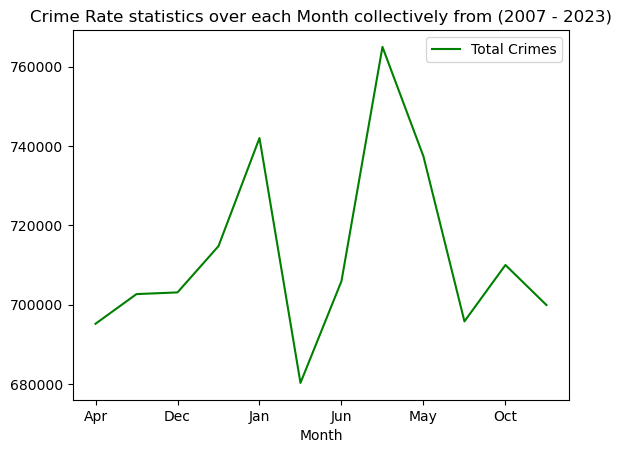

In [304]:
month_line = total_crimes_months_df.plot(kind='line', color='green', y='Total Crimes', title=("Crime Rate statistics over each Month collectively from (2007 - 2023)"))
year_line.set_ylabel('Total Crimes')
year_line.set_xlabel('Year')
plt.show